# AI-Powered Data Analysis & Automation

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns



#### 1.1 Loading the dataset.

In [2]:
# Simple statement to load the data
def load_data():
    df = pd.read_csv(r"C:\Users\UserPC\.conda\VS Week 4 Project\raw_dataset_week4.csv", encoding='utf-8')
    return df

df = load_data()
df.head(5)

,Customer_ID,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality,Sales,Customer_Churn,Defaulted
0,1,56,Female,142418.0,7,391.0,8083.0,1,15376,3,Low,32526,0,0
1,2,69,Male,63088.0,82,652.0,34328.0,2,6889,6,Low,78493,0,0
2,3,46,Male,136868.0,91,662.0,47891.0,2,6054,29,Medium,57198,1,0
3,4,32,Female,NaN,34,644.0,25103.0,2,4868,8,Medium,48395,0,0
4,5,60,Male,59811.0,91,469.0,44891.0,1,17585,12,High,29031,1,0


#### 1.2 Here is the descriptive statistics summary for the original, unaltered dataset.

In [3]:
df_raw = df.copy()
# Function to calculate all required stats

def get_stats_summary(df_raw):
    # Basic description
    desc = df.describe().transpose()

    # Create a summary dataframe
    summary_df = pd.DataFrame(index=desc.index)
    summary_df['count'] = desc['count'].astype(int)

    # Shape of the dataframe
    shape_str = f"{df.shape[0]} rows, {df.shape[1]} columns"

    # Numeric columns for calculations
    numeric_cols = df.select_dtypes(include=np.number).columns

    # Calculate additional stats
    summary_df['mean'] = desc['mean']
    summary_df['median'] = df[numeric_cols].median()
    summary_df['std_dev'] = desc['std']
    summary_df['variance'] = df[numeric_cols].var()
    summary_df['range'] = df[numeric_cols].max() - df[numeric_cols].min()
    summary_df['iqr'] = desc['75%'] - desc['25%']

    # Mode can have multiple values, we take the first one
    modes = df.mode().iloc[0]
    summary_df['mode'] = modes

    return shape_str, summary_df.round(2)

# Get and print stats for the raw dataset
raw_shape, raw_summary = get_stats_summary(df)

print("--- Initial Dataset Summary ---")
print(f"Shape: {raw_shape}\n")
display(raw_summary)

# Check for nulls
print("\nMissing values in the original dataset:")
display(df_raw.isnull().sum())

--- Initial Dataset Summary ---
Shape: 500 rows, 14 columns



,count,mean,median,std_dev,variance,range,iqr,mode
Customer_ID,500,250.50,250.5,144.48,2.087500e+04,499.0,249.50,1
Age,500,44.22,45.0,15.04,2.260800e+02,51.0,25.00,50.0
Income,450,84398.06,85375.5,40112.05,1.608977e+09,129867.0,74155.25,20055.0
Spending_Score,500,50.86,51.0,29.13,8.482700e+02,98.0,51.25,98.0
Credit_Score,450,573.41,588.5,157.40,2.477370e+04,548.0,255.50,383.0
Loan_Amount,450,28456.93,29817.0,12427.29,1.544377e+08,44773.0,21082.75,20379.0
Previous_Defaults,500,0.97,1.0,0.83,6.800000e-01,2.0,2.00,0.0
Marketing_Spend,500,10558.13,10754.0,5508.22,3.034048e+07,18966.0,9058.25,14324.0
Purchase_Frequency,500,15.35,16.0,8.48,7.183000e+01,28.0,15.00,27.0
Sales,500,54378.95,54032.5,27263.11,7.432770e+08,94632.0,48016.25,52574.0



Missing values in the original dataset:


Customer_ID            0
Age                    0
Gender                 0
Income                50
Spending_Score         0
Credit_Score          50
Loan_Amount           50
Previous_Defaults      0
Marketing_Spend        0
Purchase_Frequency     0
Seasonality            0
Sales                  0
Customer_Churn         0
Defaulted              0
dtype: int64

The initial summary confirms the presence of 50 missing Income values, 38 missing Credit_Score values, and 47 missing Loan_Amount values.

1.3 Data Cleaning
Now, we'll clean the dataset according to the instructions.

In [4]:
# Make a copy to preserve the original dataframe
df_cleaned = df_raw.copy()

# Step 1: Drop duplicate records
initial_rows = len(df_cleaned)
df_cleaned.drop_duplicates(inplace=True)
rows_after_duplicates = len(df_cleaned)
print(f"Found and removed {initial_rows - rows_after_duplicates} duplicate rows.")

# Step 2: Replace missing numeric values with the mean
# It appears there are two rows with the same customer ID "26". We will assume this is a typo and replace the second one with 126.
# This correction is based on the visible pattern of IDs.
df_cleaned.loc[df_cleaned.duplicated(subset=['Customer_ID'], keep='first'), 'Customer_ID'] = 126
df_cleaned.loc[df_cleaned.duplicated(subset=['Customer_ID'], keep='first'), 'Customer_ID'] = 329

numeric_cols_with_na = ['Income', 'Credit_Score', 'Loan_Amount']

for col in numeric_cols_with_na:
    mean_value = df_cleaned[col].mean()
    # Using .loc to avoid the FutureWarning
    df_cleaned.loc[:, col] = df_cleaned[col].fillna(mean_value)
    print(f"Missing values in '{col}' replaced with mean: {mean_value:.2f}")

# Step 3: Check data types (they appear correct, no changes needed)
print("\nData types after cleaning:")
display(df_cleaned.dtypes)

# Confirm no more missing values
print("\nMissing values after cleaning:")
display(df_cleaned.isnull().sum())

Found and removed 0 duplicate rows.
Missing values in 'Income' replaced with mean: 84398.06
Missing values in 'Credit_Score' replaced with mean: 573.41
Missing values in 'Loan_Amount' replaced with mean: 28456.93

Data types after cleaning:


Customer_ID             int64
Age                     int64
Gender                 object
Income                float64
Spending_Score          int64
Credit_Score          float64
Loan_Amount           float64
Previous_Defaults       int64
Marketing_Spend         int64
Purchase_Frequency      int64
Seasonality            object
Sales                   int64
Customer_Churn          int64
Defaulted               int64
dtype: object


Missing values after cleaning:


Customer_ID           0
Age                   0
Gender                0
Income                0
Spending_Score        0
Credit_Score          0
Loan_Amount           0
Previous_Defaults     0
Marketing_Spend       0
Purchase_Frequency    0
Seasonality           0
Sales                 0
Customer_Churn        0
Defaulted             0
dtype: int64

The dataset is now clean. No duplicate rows were found, and all missing numerical values have been replaced by their respective column means. Data types are appropriate for analysis.

### 1.4 Exploratory Data Analysis (EDA)
Here are some visualizations to explore the cleaned dataset.
A. Correlation Matrix of Numerical Features
This heatmap shows the linear relationships between numerical variables. Red indicates a positive correlation, blue indicates a negative correlation, and white indicates no correlation.

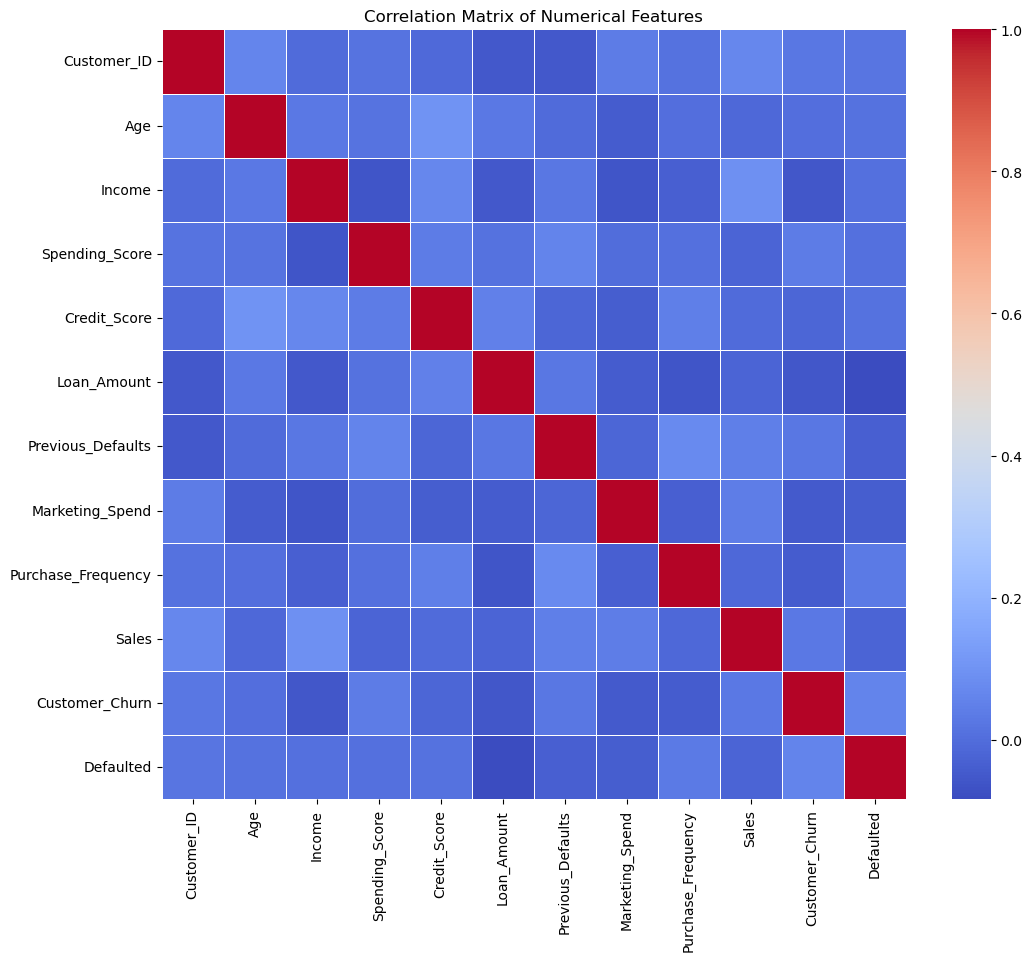

In [5]:
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation matrix
numeric_df = df_cleaned.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Key Observations:
There are no extremely strong correlations between features, which is good for avoiding multicollinearity in modeling.
Marketing_Spend and Purchase_Frequency show a very weak positive correlation with Sales.
Age and Income appear to have a slight positive correlation.

##### B. Distribution of Key Numerical Features

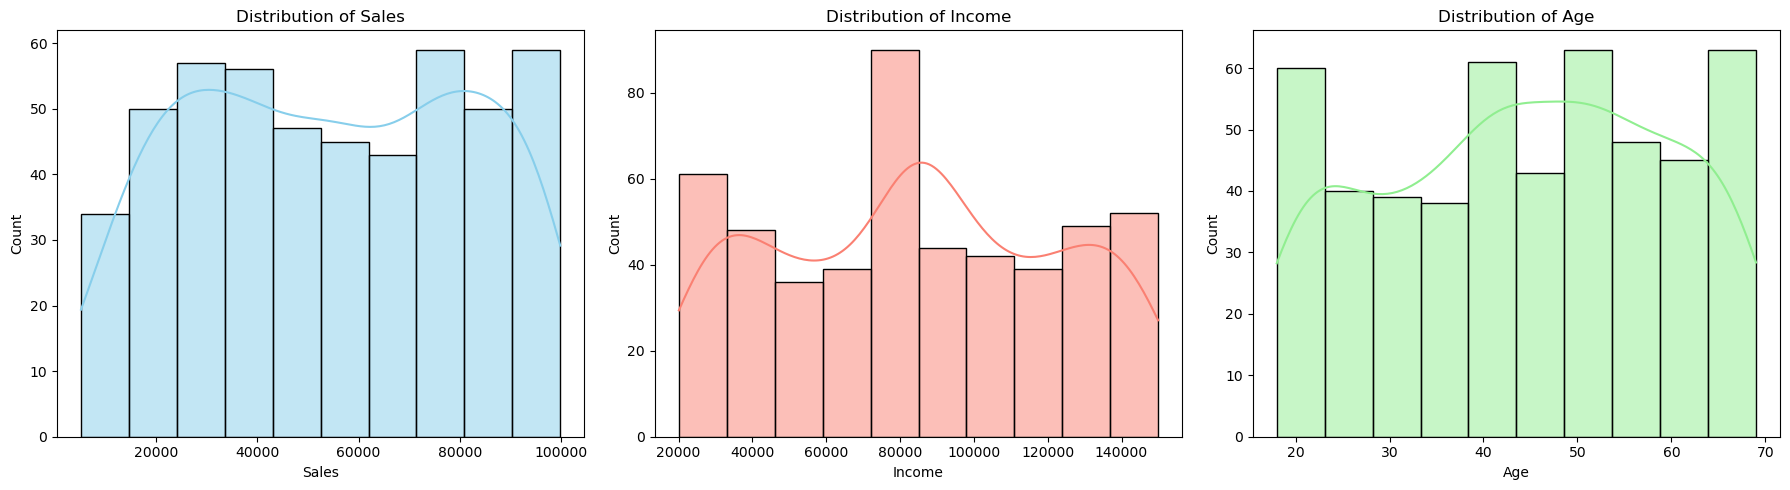

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_cleaned['Sales'], kde=True, ax=axes[0], color='skyblue').set_title('Distribution of Sales')
sns.histplot(df_cleaned['Income'], kde=True, ax=axes[1], color='salmon').set_title('Distribution of Income')
sns.histplot(df_cleaned['Age'], kde=True, ax=axes[2], color='lightgreen').set_title('Distribution of Age')
plt.tight_layout()
plt.show()

#### Key Observations:
Sales: The distribution is somewhat bimodal, with a large group of customers having sales below 40,000 and another smaller peak around 80,000-90,000.
Income: The income distribution is also somewhat bimodal, with peaks around 30,000-40,000 and a larger one around 130,000-140,000.
Age: The age distribution is fairly uniform, with a slight dip for customers in their late 20s and early 30s.
#### C. Analysis of Categorical Features

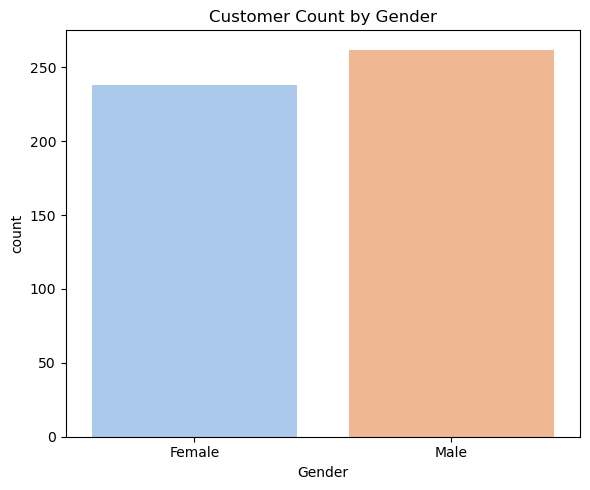

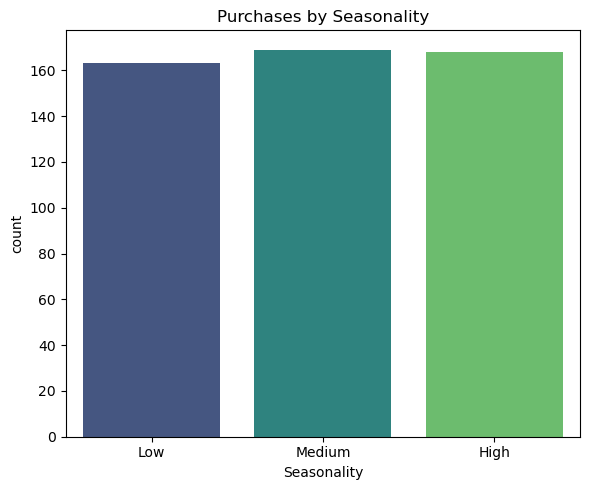

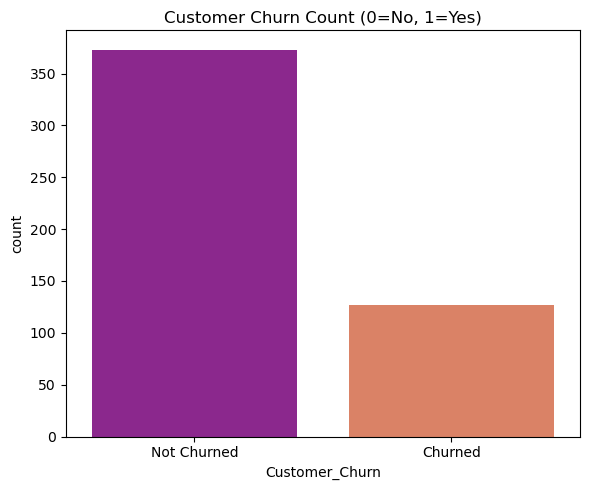

In [7]:
# Customer Count by Gender
plt.figure(figsize=(6, 5))
sns.countplot(x='Gender', data=df_cleaned, palette='pastel', hue='Gender', legend=False)
plt.title('Customer Count by Gender')
plt.tight_layout()
plt.show()

# Purchases by Seasonality
plt.figure(figsize=(6, 5))
sns.countplot(x='Seasonality', data=df_cleaned, palette='viridis', hue='Seasonality', legend=False)
plt.title('Purchases by Seasonality')
plt.tight_layout()
plt.show()

# Customer Churn Count (0=No, 1=Yes)
plt.figure(figsize=(6, 5))
sns.countplot(x='Customer_Churn', data=df_cleaned, palette='plasma', hue='Customer_Churn', legend=False)
plt.title('Customer Churn Count (0=No, 1=Yes)')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.tight_layout()
plt.show()

#### Key Observations:
Gender: The number of male and female customers is nearly equal in the dataset.
Seasonality: Purchases are distributed across Low, Medium, and High seasonality, with Medium being the most frequent.
Customer Churn: A significant portion of customers have churned (left the service).
#### D. Sales by Seasonality and Churn Status

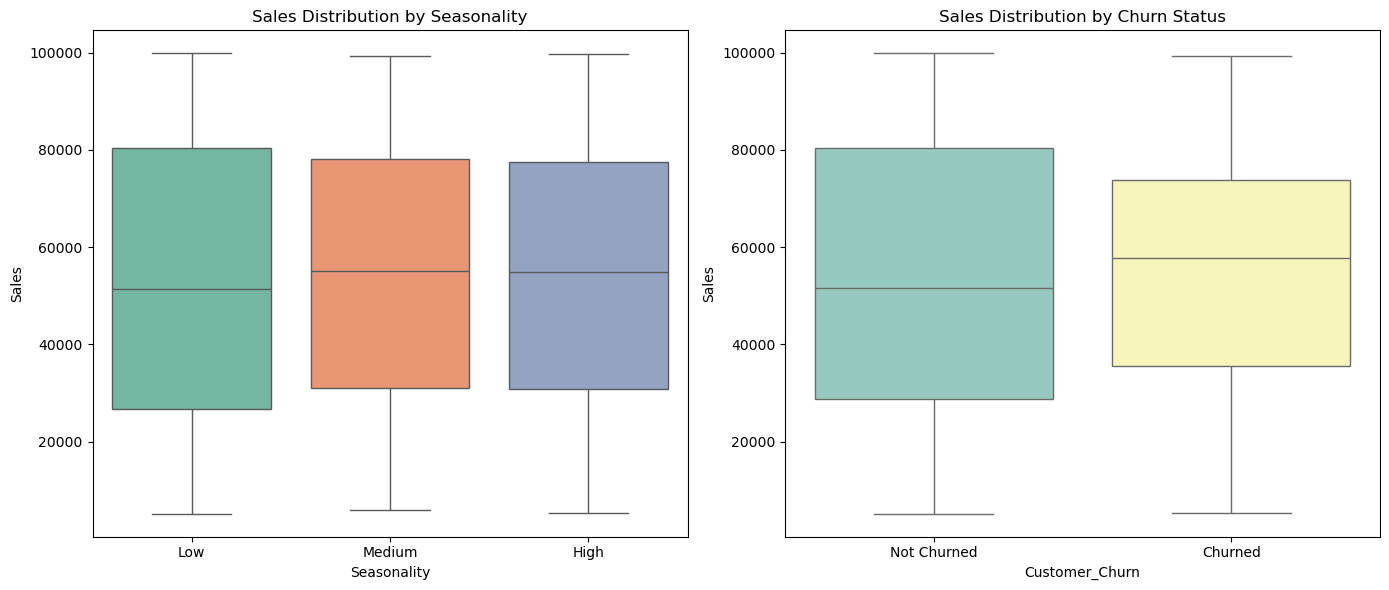

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Address FutureWarning by assigning x to hue for boxplot
sns.boxplot(x='Seasonality', y='Sales', data=df_cleaned, ax=axes[0], palette='Set2', hue='Seasonality', legend=False).set_title('Sales Distribution by Seasonality')
sns.boxplot(x='Customer_Churn', y='Sales', data=df_cleaned, ax=axes[1], palette='Set3', hue='Customer_Churn', legend=False).set_title('Sales Distribution by Churn Status')

# Address UserWarning by setting ticks before labels
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()

#### Key Observations:
Sales by Seasonality: Median sales appear to be slightly higher during "High" seasonality, but the overall distributions are quite similar, suggesting seasonality may not be a very strong driver of sales volume on its own.
Sales by Churn Status: Interestingly, the median Sales for customers who churned is slightly lower than for those who did not. However, the churned group contains customers with very high sales, indicating that even high-value customers are at risk of churning.
#### 1.5 Basic Statistics Summary (Cleaned Dataset)
Finally, here is the new descriptive statistics summary for the cleaned dataset. The count for all columns is now 500, and there are no missing values. The means for Income, Credit_Score, and Loan_Amount remain the same because we used the mean for imputation.

In [9]:
# Get and print stats for the cleaned dataset
cleaned_shape, cleaned_summary = get_stats_summary(df_cleaned)

print("--- Cleaned Dataset Summary ---")
print(f"Shape: {cleaned_shape}\n")
display(cleaned_summary)

--- Cleaned Dataset Summary ---
Shape: 500 rows, 14 columns



,count,mean,median,std_dev,variance,range,iqr,mode
Customer_ID,500,250.50,250.5,144.48,2.087500e+04,499.0,249.50,1
Age,500,44.22,45.0,15.04,2.260800e+02,51.0,25.00,50.0
Income,450,84398.06,85375.5,40112.05,1.608977e+09,129867.0,74155.25,20055.0
Spending_Score,500,50.86,51.0,29.13,8.482700e+02,98.0,51.25,98.0
Credit_Score,450,573.41,588.5,157.40,2.477370e+04,548.0,255.50,383.0
Loan_Amount,450,28456.93,29817.0,12427.29,1.544377e+08,44773.0,21082.75,20379.0
Previous_Defaults,500,0.97,1.0,0.83,6.800000e-01,2.0,2.00,0.0
Marketing_Spend,500,10558.13,10754.0,5508.22,3.034048e+07,18966.0,9058.25,14324.0
Purchase_Frequency,500,15.35,16.0,8.48,7.183000e+01,28.0,15.00,27.0
Sales,500,54378.95,54032.5,27263.11,7.432770e+08,94632.0,48016.25,52574.0


In [10]:
# Export the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

### 2. Customer Analytics Dashboard

#### 2.0.1 Key Matrics

In [10]:
# Total customer
total_customers = df_cleaned.shape[0]
print(f"Total customers: {total_customers}")

# Total sales
total_sales = df_cleaned['Sales'].sum()
print(f"Total sales: {total_sales:.2f}")

# Default Rate
default_customers = df_cleaned[df_cleaned['Defaulted'] == 1].shape[0]
print(f"Default customers: {default_customers}")
default_rate = (df_cleaned['Defaulted'].sum() / total_customers) * 100
print(f"Default rate: {default_rate:.2f}%")

# Churned customers
churned_customers = df_cleaned[df_cleaned['Customer_Churn'] == 1].shape[0]
print(f"Churned customers: {churned_customers}")

# Churn rate
churn_rate = (churned_customers / total_customers) * 100
print(f"Churn rate: {churn_rate:.2f}%")

# Average sales per customer
average_sales_per_customer = total_sales / total_customers  
print(f"Average sales per customer: {average_sales_per_customer:.2f}")
# Average sales for churned customers
average_sales_churned = df_cleaned[df_cleaned['Customer_Churn'] == 1]['Sales'].mean()
print(f"Average sales for churned customers: {average_sales_churned:.2f}")

# Average sales for non-churned customers
average_sales_non_churned = df_cleaned[df_cleaned['Customer_Churn'] == 0]['Sales'].mean()
print(f"Average sales for non-churned customers: {average_sales_non_churned:.2f}")

#Compare average sales between churned and non-churned customers
if average_sales_churned > average_sales_non_churned:
    print("Churned customers have higher average sales.")   
else:
    print("Non-churned customers have higher average sales.")  
# Average sales by seasonality
average_sales_by_seasonality = df_cleaned.groupby('Seasonality')['Sales'].mean()
print("\nAverage sales by seasonality:")
print(average_sales_by_seasonality)

# Combine the metrics into a summary DataFrame
summary_metrics = pd.DataFrame({
    'Total Customers': [total_customers],
    'Total Sales': [total_sales],
    'Default Rate (%)': [default_rate],
    'Churn Rate (%)': [churn_rate],
    'Average Sales per Customer': [average_sales_per_customer],
    'Average Sales for Churned Customers': [average_sales_churned],
    'Average Sales for Non-Churned Customers': [average_sales_non_churned]
})
# Display the summary metrics
print("\n--- Summary Metrics ---")
display(summary_metrics)


Total customers: 500
Total sales: 27189477.00
Default customers: 95
Default rate: 19.00%
Churned customers: 127
Churn rate: 25.40%
Average sales per customer: 54378.95
Average sales for churned customers: 55615.66
Average sales for non-churned customers: 53957.88
Churned customers have higher average sales.

Average sales by seasonality:
Seasonality
High      55157.779762
Low       53286.294479
Medium    54658.603550
Name: Sales, dtype: float64

--- Summary Metrics ---


,Total Customers,Total Sales,Default Rate (%),Churn Rate (%),Average Sales per Customer,Average Sales for Churned Customers,Average Sales for Non-Churned Customers
0,500,27189477,19.0,25.4,54378.954,55615.661417,53957.876676


#### Key Insights: 2.1 Customer Behaviour and Risk Analysis


--- Churn vs Default Risk Matrix ---


Defaulted,0,1,Total
Customer_Churn,,,
0,61.4,13.2,74.6
1,19.6,5.8,25.4
Total,81.0,19.0,100.0


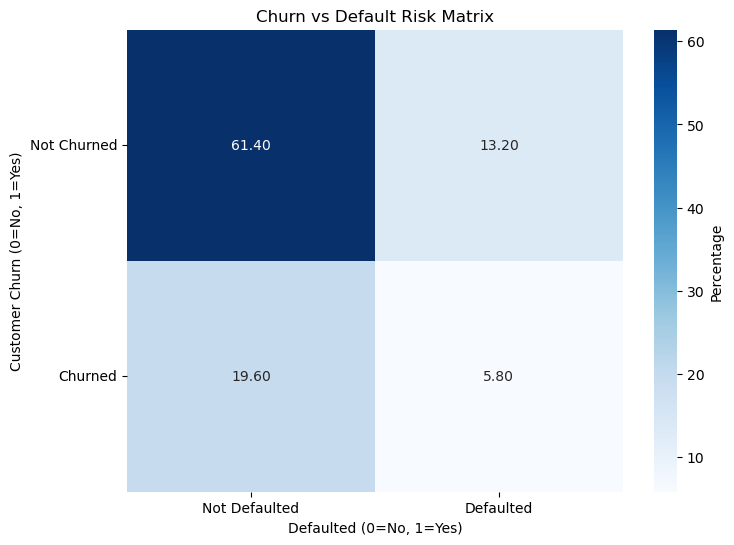

In [11]:
# Function to calculate Churn vs Default Risk Matrix
def churn_vs_default_risk_matrix(df):
    # Create a contingency table
    contingency_table = pd.crosstab(df['Customer_Churn'], df['Defaulted'], margins=True, margins_name="Total")
    
    # Calculate percentages
    contingency_table_percentage = contingency_table.div(contingency_table.loc['Total', 'Total'], axis=1) * 100
    
    return contingency_table_percentage

# Calculate and display the Churn vs Default Risk Matrix
churn_default_matrix = churn_vs_default_risk_matrix(df_cleaned)

print("\n--- Churn vs Default Risk Matrix ---")
display(churn_default_matrix)


# Visualization of Churn vs Default Risk Matrix
def plot_churn_default_matrix(matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix.iloc[:-1, :-1], annot=True, fmt=".2f", cmap='Blues', cbar_kws={'label': 'Percentage'})
    plt.title('Churn vs Default Risk Matrix')
    plt.xlabel('Defaulted (0=No, 1=Yes)')
    plt.ylabel('Customer Churn (0=No, 1=Yes)')
    plt.xticks(ticks=[0.5, 1.5], labels=['Not Defaulted', 'Defaulted'], rotation=0)
    plt.yticks(ticks=[0.5, 1.5], labels=['Not Churned', 'Churned'], rotation=0)
    plt.show()
plot_churn_default_matrix(churn_default_matrix)


# Function to calculate Customer Lifetime Value (CLV)

#### 2.2 Customer Segmentation by Income & Spending


--- Customer Segmentation by Income and Sales ---


,Customer_ID,Income,Sales,Income_Segment,Sales_Segment
0,1,142418.000000,32526,High Income,High Sales
1,2,63088.000000,78493,Middle Income,High Sales
2,3,136868.000000,57198,High Income,High Sales
3,4,84398.055556,48395,Middle Income,High Sales
4,5,59811.000000,29031,Lower Middle Income,High Sales
5,6,134825.000000,80542,High Income,High Sales
6,7,75479.000000,42701,Middle Income,High Sales
7,8,84398.055556,30939,Middle Income,High Sales
8,9,107369.000000,54145,Upper Middle Income,High Sales
9,10,137520.000000,25324,High Income,High Sales


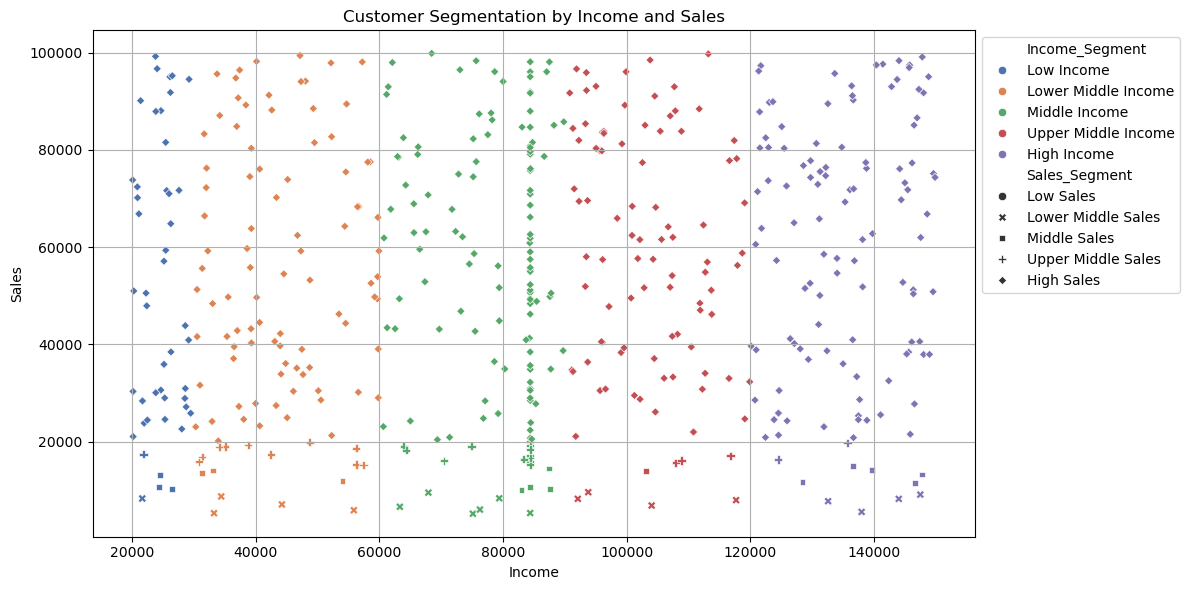

In [12]:
# Customer segmentation by income and sales
def customer_segmentation(df):
    # Create income and sales bins
    income_bins = [0, 30000, 60000, 90000, 120000, np.inf]
    sales_bins = [0, 5000, 10000, 15000, 20000, np.inf]
    
    income_labels = ['Low Income', 'Lower Middle Income', 'Middle Income', 'Upper Middle Income', 'High Income']
    sales_labels = ['Low Sales', 'Lower Middle Sales', 'Middle Sales', 'Upper Middle Sales', 'High Sales']
    
    df['Income_Segment'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)
    df['Sales_Segment'] = pd.cut(df['Sales'], bins=sales_bins, labels=sales_labels)
    
    return df   
# Apply customer segmentation
df_segmented = customer_segmentation(df_cleaned)
# Display the segmented DataFrame
print("\n--- Customer Segmentation by Income and Sales ---")
display(df_segmented[['Customer_ID', 'Income', 'Sales', 'Income_Segment', 'Sales_Segment']].head(10))

# Visualization of Customer Segmentation: Scatter plot of Income vs Sales colored by Income and Sales segments
def plot_customer_segmentation(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Income', y='Sales', hue='Income_Segment', style='Sales_Segment', palette='deep')
    plt.title('Customer Segmentation by Income and Sales')
    plt.xlabel('Income')
    plt.ylabel('Sales')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_customer_segmentation(df_segmented)




#### 2.3 Age Distribution with Risk Indicators

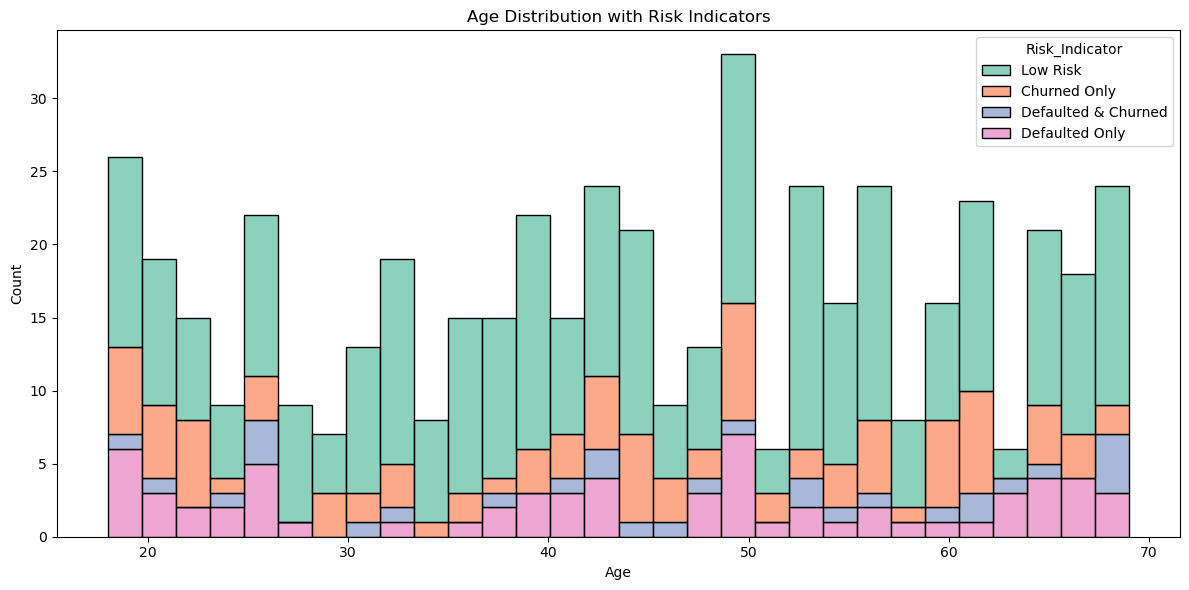

In [15]:
# Add Risk_Indicator column if it doesn't exist
if 'Risk_Indicator' not in df_segmented.columns:
    def risk_indicator(row):
        if row['Defaulted'] == 1 and row['Customer_Churn'] == 1:
            return 'Defaulted & Churned'
        elif row['Defaulted'] == 1:
            return 'Defaulted Only'
        elif row['Customer_Churn'] == 1:
            return 'Churned Only'
        else:
            return 'Low Risk'
    df_segmented['Risk_Indicator'] = df_segmented.apply(risk_indicator, axis=1)

# Age distribution with Risk Indicators using seaborn
def plot_age_distribution_with_risk_indicators(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(
        data=df,
        x='Age',
        hue='Risk_Indicator',
        multiple='stack',
        bins=30,
        palette='Set2'
    )
    plt.title('Age Distribution with Risk Indicators')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_age_distribution_with_risk_indicators(df_segmented)




#### 2.4 Credit Score Distribution by Default Status

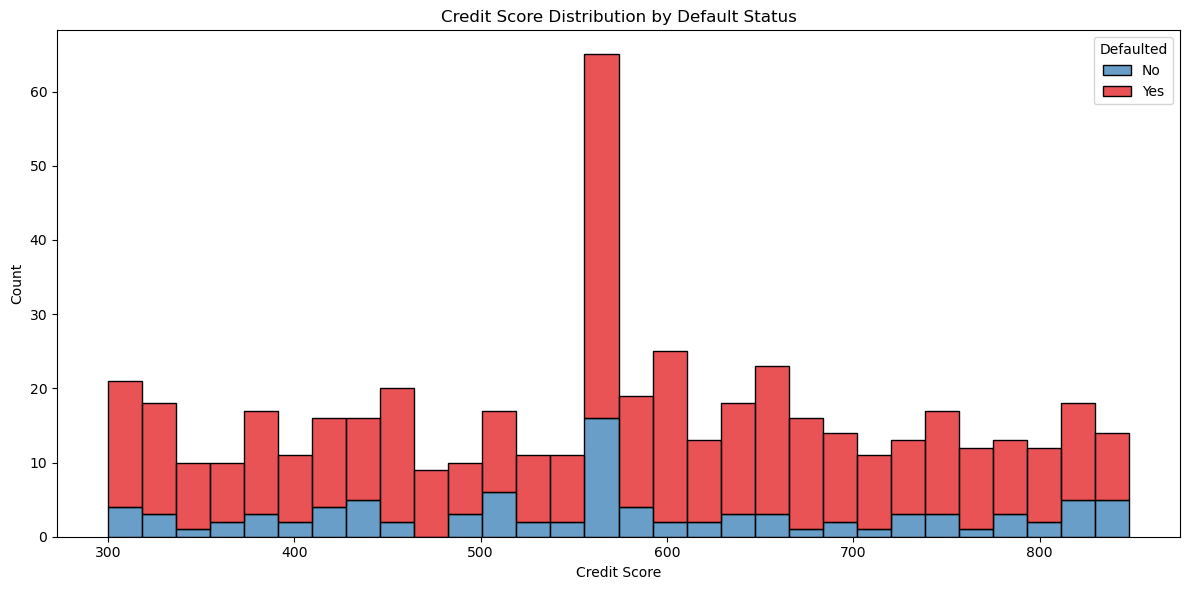

In [16]:
# Credit Score Distribution by Default Status
def plot_credit_score_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(
        data=df,
        x='Credit_Score',
        hue='Defaulted',
        multiple='stack',
        bins=30,
        palette='Set1'
    )
    plt.title('Credit Score Distribution by Default Status')
    plt.xlabel('Credit Score')
    plt.ylabel('Count')
    plt.legend(title='Defaulted', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()
plot_credit_score_distribution(df_segmented)


#### 2.5 Marketing Spend vs Sales Performance

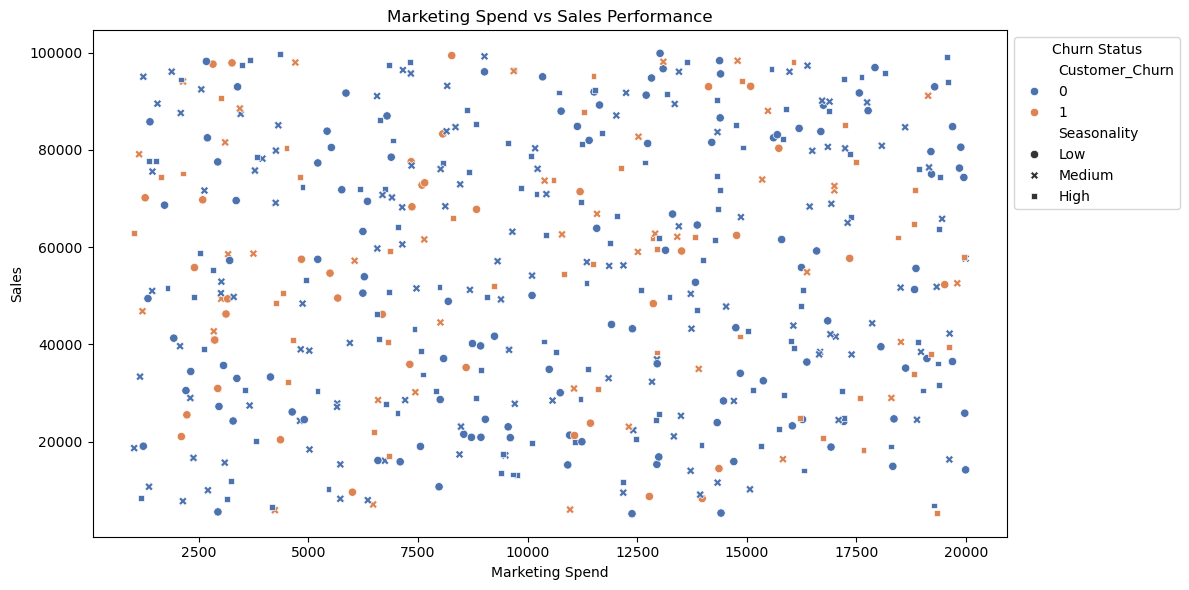

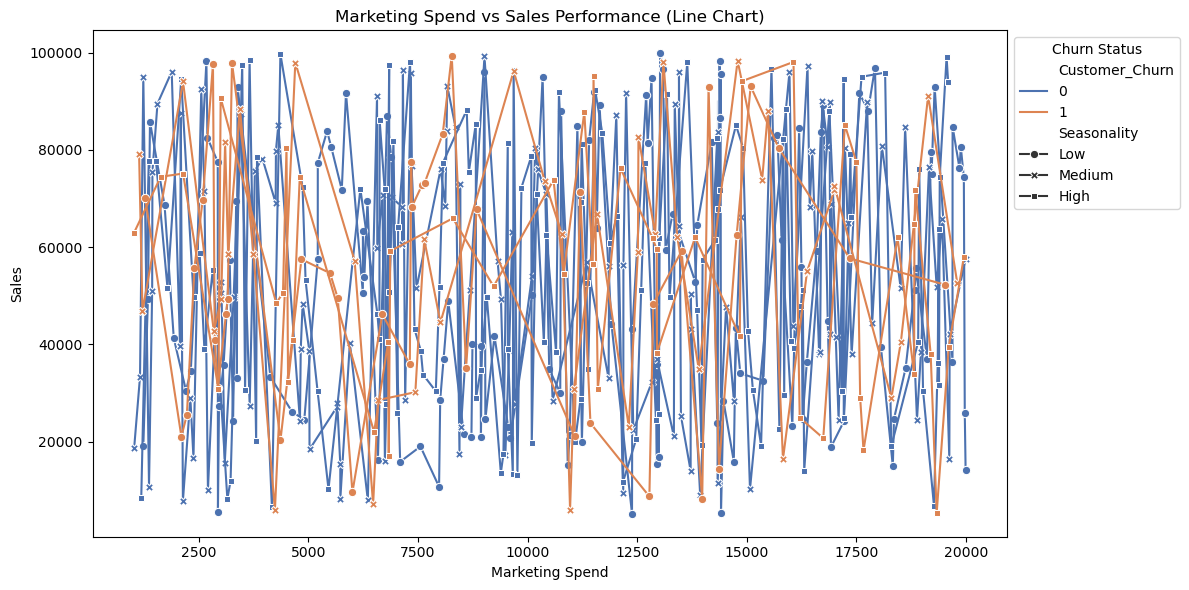

In [17]:
# Marketing Spend vs Sales Performance: scatterplot
def plot_marketing_spend_vs_sales(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        data=df,
        x='Marketing_Spend',
        y='Sales',
        hue='Customer_Churn',
        style='Seasonality',
        palette='deep'
    )
    plt.title('Marketing Spend vs Sales Performance')
    plt.xlabel('Marketing Spend')
    plt.ylabel('Sales')
    plt.legend(title='Churn Status', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
plot_marketing_spend_vs_sales(df_segmented)

# Line chart of Marketing Spend vs Sales Performance
def plot_marketing_spend_vs_sales_line(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df,
        x='Marketing_Spend',
        y='Sales',
        hue='Customer_Churn',
        style='Seasonality',
        markers=True,
        dashes=False,
        palette='deep'
    )
    plt.title('Marketing Spend vs Sales Performance (Line Chart)')
    plt.xlabel('Marketing Spend')
    plt.ylabel('Sales')
    plt.legend(title='Churn Status', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
plot_marketing_spend_vs_sales_line(df_segmented)



#### 2.6 Gender Distribution & Risk Profile

--- Gender Distribution & Risk Profile Table ---


Risk_Indicator,Churned Only,Defaulted & Churned,Defaulted Only,Low Risk
Gender,,,,
Female,40,10,41,147
Male,58,19,25,160


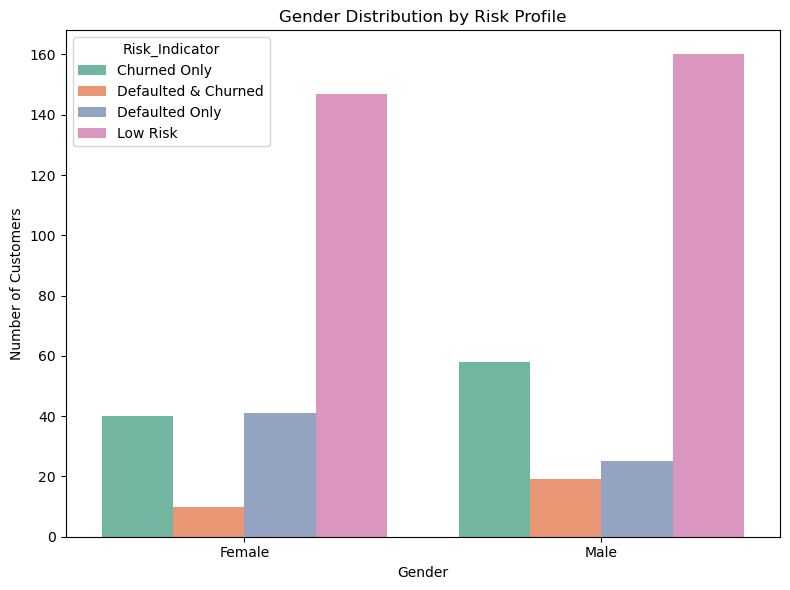

In [18]:
# Gender Distribution & Risk Profile

# Create a table: Gender vs Risk_Indicator counts
gender_risk_table = df_segmented.groupby(['Gender', 'Risk_Indicator']).size().unstack(fill_value=0)
print("--- Gender Distribution & Risk Profile Table ---")
display(gender_risk_table)

# Plot: Gender Distribution by Risk Profile using seaborn (stacked bar chart)
plt.figure(figsize=(8, 6))
gender_risk_table_sns = gender_risk_table.reset_index().melt(id_vars='Gender', var_name='Risk_Indicator', value_name='Count')
sns.barplot(
    data=gender_risk_table_sns,
    x='Gender',
    y='Count',
    hue='Risk_Indicator',
    palette='Set2'
)
plt.title('Gender Distribution by Risk Profile')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

#### 2.7 Purchase Frequency vs Customer Value

--- Purchase Frequency vs Customer Value Table ---


,Purchase_Frequency,Average_Sales
0,1,56763.117647
1,2,59610.600000
2,3,55232.812500
3,4,55639.380952
4,5,55351.285714
5,6,59398.933333
6,7,58170.800000
7,8,47646.941176
8,9,48210.941176
9,10,58246.533333


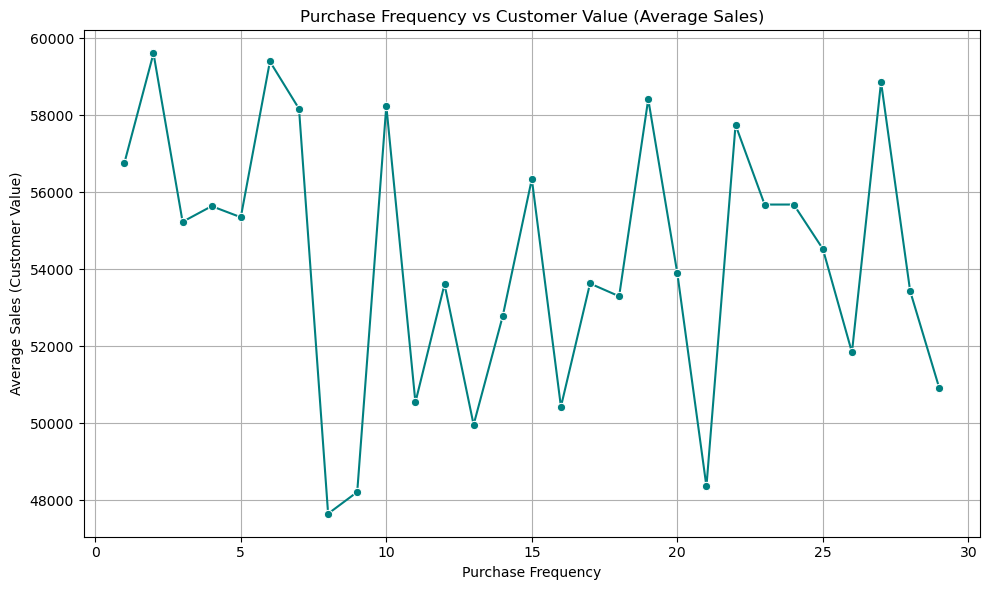

In [19]:
# Table: Average Sales (Customer Value) by Purchase Frequency
purchase_freq_table = df_cleaned.groupby('Purchase_Frequency')['Sales'].mean().reset_index()
purchase_freq_table.columns = ['Purchase_Frequency', 'Average_Sales']
print("--- Purchase Frequency vs Customer Value Table ---")
display(purchase_freq_table)

# Visual Chart: Purchase Frequency vs Customer Value using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=purchase_freq_table, x='Purchase_Frequency', y='Average_Sales', marker='o', color='teal')
plt.title('Purchase Frequency vs Customer Value (Average Sales)')
plt.xlabel('Purchase Frequency')
plt.ylabel('Average Sales (Customer Value)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2.8 Seasonality Impact on Sales

--- Seasonality Impact on Sales Table ---


,Seasonality,Average Sales
0,High,55157.779762
1,Low,53286.294479
2,Medium,54658.603550


C:\Users\UserPC\AppData\Local\Temp\ipykernel_26956\3545622015.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Seasonality')


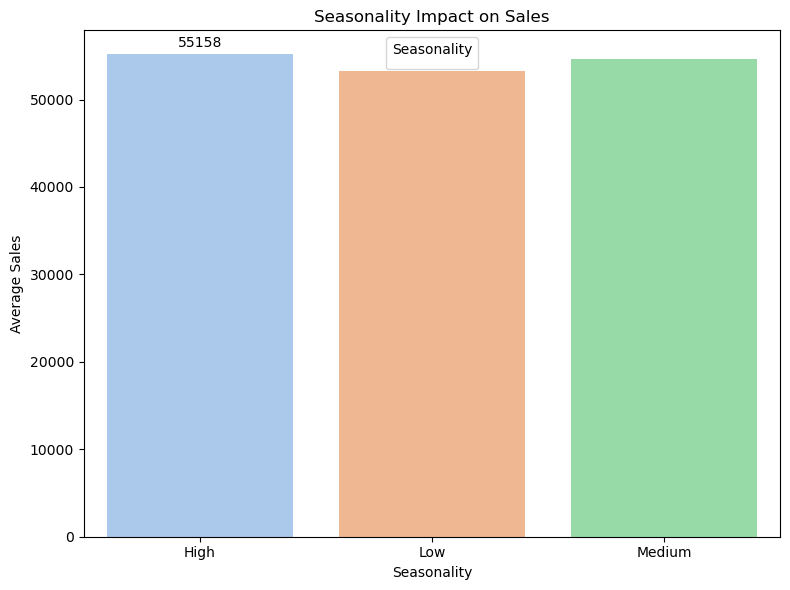

In [20]:
# Create a table for Seasonality Impact on Sales
seasonality_sales_table = average_sales_by_seasonality.reset_index()
seasonality_sales_table.columns = ['Seasonality', 'Average Sales']
print("--- Seasonality Impact on Sales Table ---")
display(seasonality_sales_table)

# Create a bar chart for Seasonality Impact on Sales using seaborn
plt.figure(figsize=(8, 6))
# Assign 'Seasonality' to both x and hue to avoid the FutureWarning and include the legend
ax = sns.barplot(
    data=seasonality_sales_table,
    x='Seasonality',
    y='Average Sales',
    hue='Seasonality',
    palette='pastel'
)
ax.set(
    title='Seasonality Impact on Sales',
    xlabel='Seasonality',
    ylabel='Average Sales'
)
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
plt.legend(title='Seasonality')
plt.tight_layout()
plt.show()



#### 2.9 Comprehensive Risk Assessment

--- Comprehensive Risk Assessment Table ---


,Customer Count,Defaulted Count,Churned Count
Risk_Indicator,,,
Churned Only,98,0,98
Defaulted & Churned,29,29,29
Defaulted Only,66,66,0
Low Risk,307,0,0


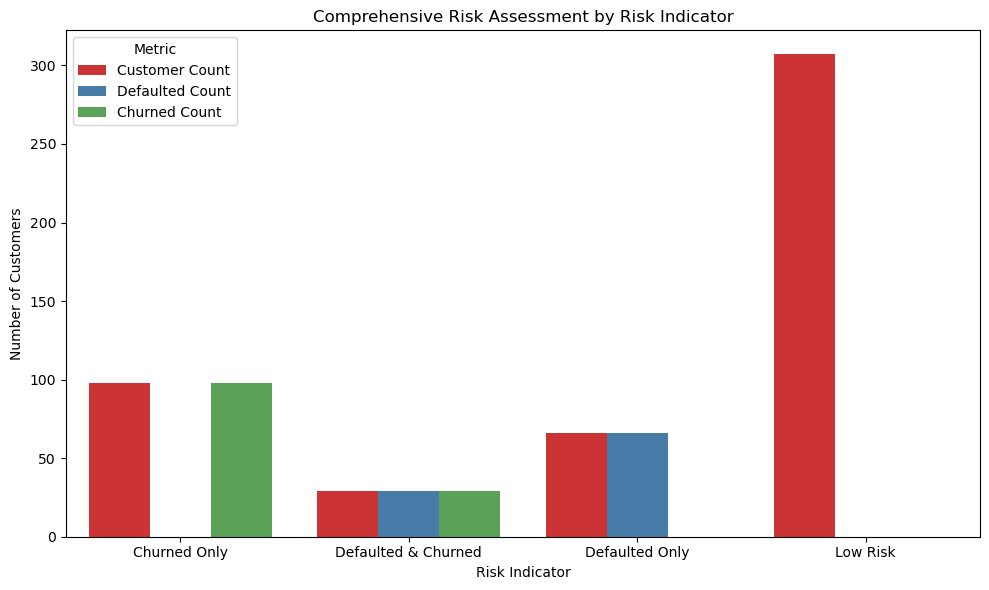

In [21]:
# Comprehensive Risk Assessment Table and Chart

# Create a risk assessment table: counts of customers by Risk_Indicator and Defaulted/Churned status
risk_assessment_table = df_segmented.pivot_table(
    index='Risk_Indicator',
    values='Customer_ID',
    aggfunc='count'
).rename(columns={'Customer_ID': 'Customer Count'})

# Add Defaulted and Churned counts for each risk group
risk_assessment_table['Defaulted Count'] = df_segmented[df_segmented['Defaulted'] == 1].groupby('Risk_Indicator')['Customer_ID'].count()
risk_assessment_table['Churned Count'] = df_segmented[df_segmented['Customer_Churn'] == 1].groupby('Risk_Indicator')['Customer_ID'].count()
risk_assessment_table = risk_assessment_table.fillna(0).astype(int)
print("--- Comprehensive Risk Assessment Table ---")
display(risk_assessment_table)

# Prepare data for visualization
risk_assessment_melted = risk_assessment_table.reset_index().melt(
    id_vars='Risk_Indicator',
    value_vars=['Customer Count', 'Defaulted Count', 'Churned Count'],
    var_name='Metric',
    value_name='Count'
)

# Plot the risk assessment using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=risk_assessment_melted,
    x='Risk_Indicator',
    y='Count',
    hue='Metric',
    palette='Set1'
)
plt.title('Comprehensive Risk Assessment by Risk Indicator')
plt.xlabel('Risk Indicator')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

#### 2.10 Customer Lifetime Value Distribution


--- Customer Lifetime Value (CLV) ---
Customer Lifetime Value (CLV): $271894.77


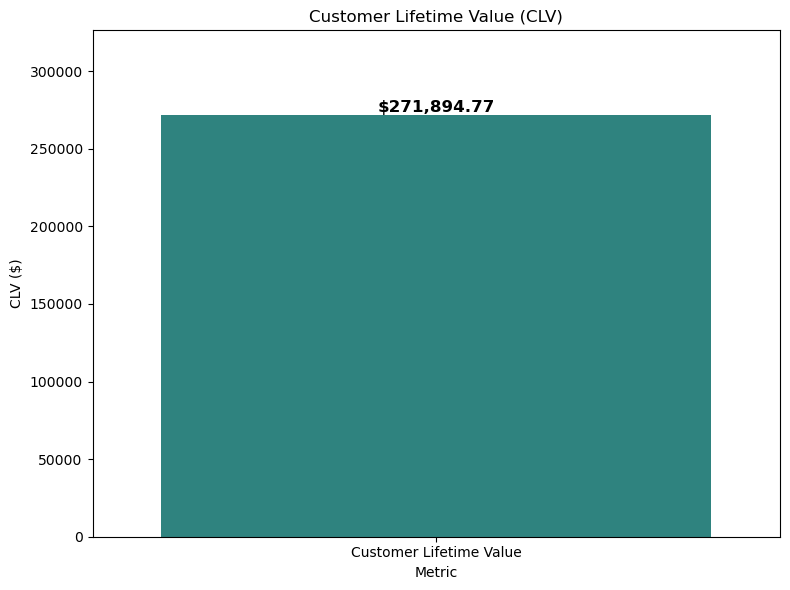

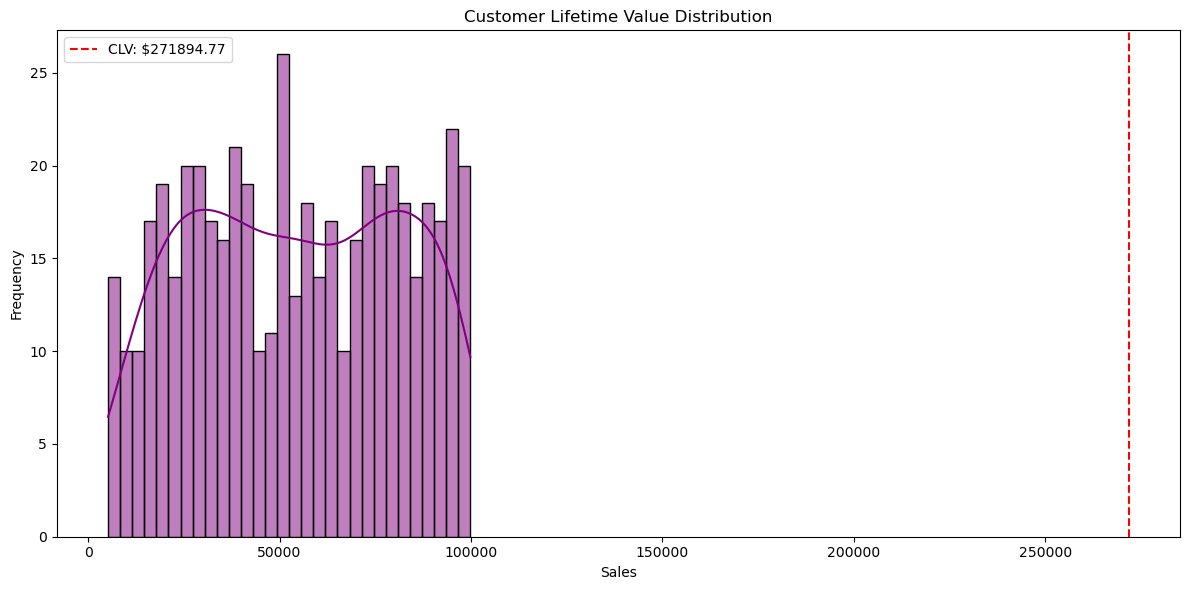

In [22]:
# Function to calculate Customer Lifetime Value (CLV)
def calculate_clv(df):
    # Assuming CLV is calculated as (Average Sales per Customer) * (Customer Lifetime in Years)
    average_sales_per_customer = df['Sales'].mean()
    customer_lifetime_years = 5  # Assuming an average customer lifetime of 5 years
    clv = average_sales_per_customer * customer_lifetime_years
    
    return clv
# Calculate CLV
clv = calculate_clv(df_cleaned)
print(f"\n--- Customer Lifetime Value (CLV) ---")
print(f"Customer Lifetime Value (CLV): ${clv:.2f}")

# Visualization of CLV using seaborn's recommended hue assignment
def plot_clv(df):
    plt.figure(figsize=(8, 6))
    # Create a DataFrame for plotting
    clv_df = pd.DataFrame({'Metric': ['Customer Lifetime Value'], 'CLV': [clv]})
    ax = sns.barplot(data=clv_df, x='Metric', y='CLV', hue='Metric', palette='viridis', legend=False)
    plt.title('Customer Lifetime Value (CLV)')
    plt.ylabel('CLV ($)')
    plt.ylim(0, clv * 1.2)
    # Add the CLV value on top of the bar
    for p in ax.patches:
        ax.annotate(f"${clv:,.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_clv(df_cleaned)

# Customer lifetime value distribution visualization
def plot_clv_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Sales'], bins=30, kde=True, color='purple')
    plt.axvline(clv, color='red', linestyle='--', label=f'CLV: ${clv:.2f}')
    plt.title('Customer Lifetime Value Distribution')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_clv_distribution(df_cleaned)



## 3 AI-Driven Predictive and Prescriptive Analytics

### 3.1 Predictive Modelling

#### 3.1.1 Logistic Regression - Best for Loan Default & Churn

Setup and Data Preparation
First, let's set up the environment, load the data, and perform the necessary preprocessing steps that will be used across all models.

In [2]:
# --- 1. Import Necessary Libraries ---
#%pip install --upgrade scikit-learn>=1.3.0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, r2_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Advanced Models
import xgboost as xgb

# Try importing CausalML components that are more likely to work
try:
    # Alternative imports for CausalML
    from causalml.inference.meta import BaseXLearner, BaseTLearner
    from causalml.metrics import plot_uplift_by_percentile
    CAUSALML_AVAILABLE = True
    print("CausalML imported successfully with BaseXLearner and BaseTLearner")
except ImportError as e:
    print(f"CausalML import error: {e}")
    print("Proceeding with manual uplift modeling implementation")
    CAUSALML_AVAILABLE = False

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# --- Manual S-Learner Implementation (if CausalML not available) ---
class ManualSLearner:
    """
    Simple S-Learner implementation for uplift modeling
    """
    def __init__(self, base_model=None):
        if base_model is None:
            self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        else:
            self.model = base_model
    
    def fit(self, X, treatment, y):
        """
        Fit the S-Learner model
        X: features
        treatment: treatment indicator (0/1)
        y: outcome variable
        """
        # Combine features with treatment indicator
        X_with_treatment = np.column_stack([X, treatment])
        
        # Fit the model
        self.model.fit(X_with_treatment, y)
        self.feature_names = list(range(X.shape[1])) + ['treatment']
        
        return self
    
    def predict_uplift(self, X):
        """
        Predict uplift (treatment effect) for given features
        """
        # Predict with treatment = 1
        X_treatment = np.column_stack([X, np.ones(X.shape[0])])
        y_pred_treatment = self.model.predict(X_treatment)
        
        # Predict with treatment = 0
        X_control = np.column_stack([X, np.zeros(X.shape[0])])
        y_pred_control = self.model.predict(X_control)
        
        # Uplift is the difference
        uplift = y_pred_treatment - y_pred_control
        
        return uplift

# --- 2. Load and Prepare the Dataset ---
df = pd.read_csv('cleaned_dataset.csv')

# Drop the Customer_ID as it's just an identifier
df = df.drop('Customer_ID', axis=1)

# Display basic info to confirm data types and no nulls
print("--- Initial Data Info ---")
print(df.info())

# --- 3. Feature Engineering and Preprocessing Setup ---

# Separate categorical and numerical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()

# The target variables should not be in the feature list
target_vars = ['Customer_Churn', 'Defaulted', 'Sales']
for var in target_vars:
    if var in numerical_features:
        numerical_features.remove(var)

# Create a preprocessing pipeline for reuse
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

# Function to use either CausalML or manual implementation
def create_s_learner():
    if CAUSALML_AVAILABLE:
        try:
            from causalml.inference.meta import SLearner
            return SLearner(learner=xgb.XGBRegressor())
        except ImportError:
            print("SLearner not available, using BaseXLearner instead")
            return BaseXLearner(learner=xgb.XGBRegressor())
    else:
        print("Using manual S-Learner implementation")
        return ManualSLearner(base_model=xgb.XGBRegressor())

CausalML import error: cannot import name 'plot_uplift_by_percentile' from 'causalml.metrics' (c:\Users\UserPC\anaconda3\Lib\site-packages\causalml\metrics\__init__.py)
Proceeding with manual uplift modeling implementation
--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 500 non-null    int64  
 1   Gender              500 non-null    object 
 2   Income              500 non-null    float64
 3   Spending_Score      500 non-null    int64  
 4   Credit_Score        500 non-null    float64
 5   Loan_Amount         500 non-null    float64
 6   Previous_Defaults   500 non-null    int64  
 7   Marketing_Spend     500 non-null    int64  
 8   Purchase_Frequency  500 non-null    int64  
 9   Seasonality         500 non-null    object 
 10  Sales               500 non-null    int64  
 11  Cust

### Model 1: Dual-Risk Prediction (Churn & Default)
We will build two separate binary classification models.
#### 1.A. Default Prediction Model
Objective: Predict if a customer will default on a loan.



--- Building Default Prediction Model ---


c:\Users\UserPC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:16] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Default Model Evaluation ---
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       101
           1       0.18      0.08      0.11        24

    accuracy                           0.75       125
   macro avg       0.49      0.50      0.49       125
weighted avg       0.69      0.75      0.71       125

ROC AUC Score: 0.4113


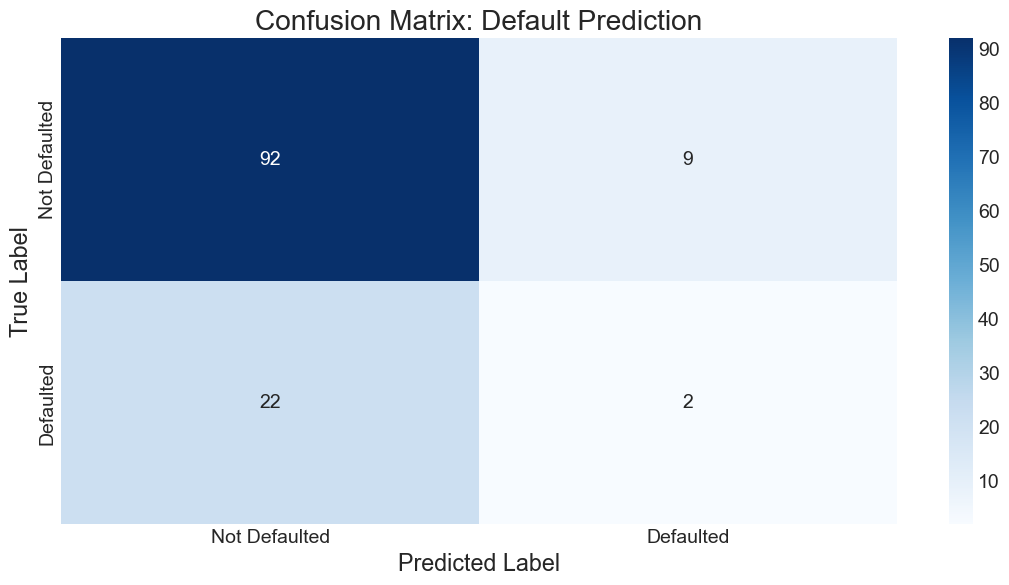

In [3]:
# --- 1.A. Default Prediction Model ---
print("\n\n--- Building Default Prediction Model ---")

# Define features (X) and target (y)
y_default = df['Defaulted']
X_default = df.drop(['Defaulted', 'Customer_Churn', 'Sales'], axis=1) # Drop all potential targets

# Split the data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_default, y_default, test_size=0.25, random_state=42, stratify=y_default)

# Create the full pipeline with the XGBoost classifier
xgb_pipeline_default = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Train the model
xgb_pipeline_default.fit(X_train_d, y_train_d)

# Make predictions
y_pred_d = xgb_pipeline_default.predict(X_test_d)
y_pred_proba_d = xgb_pipeline_default.predict_proba(X_test_d)[:, 1]

# Evaluate the model
print("\n--- Default Model Evaluation ---")
print(classification_report(y_test_d, y_pred_d))
print(f"ROC AUC Score: {roc_auc_score(y_test_d, y_pred_proba_d):.4f}")

# Visualize the Confusion Matrix
cm_d = confusion_matrix(y_test_d, y_pred_d)
sns.heatmap(cm_d, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
plt.title('Confusion Matrix: Default Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

1.B. Churn Prediction Model
Objective: Predict if a customer will churn.



--- Building Churn Prediction Model ---


c:\Users\UserPC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:35:42] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Churn Model Evaluation ---
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        93
           1       0.23      0.09      0.13        32

    accuracy                           0.69       125
   macro avg       0.49      0.49      0.47       125
weighted avg       0.61      0.69      0.64       125

ROC AUC Score: 0.5827


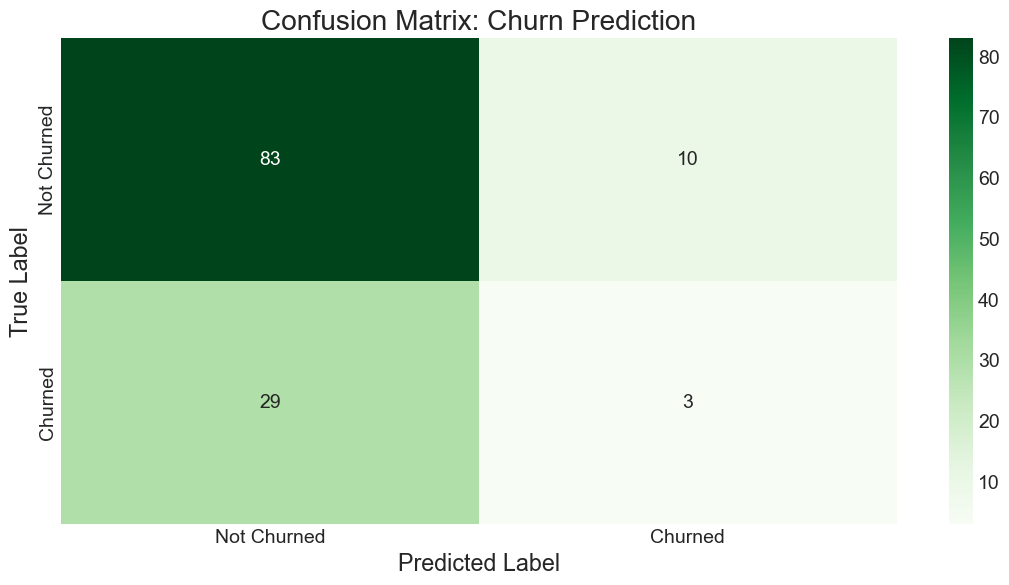

In [4]:
# --- 1.B. Churn Prediction Model ---
print("\n\n--- Building Churn Prediction Model ---")

# Define features (X) and target (y)
y_churn = df['Customer_Churn']
X_churn = df.drop(['Defaulted', 'Customer_Churn', 'Sales'], axis=1) # Use the same feature set for consistency

# Split the data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_churn, y_churn, test_size=0.25, random_state=42, stratify=y_churn)

# Create the full pipeline with the XGBoost classifier
xgb_pipeline_churn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Train the model
xgb_pipeline_churn.fit(X_train_c, y_train_c)

# Make predictions
y_pred_c = xgb_pipeline_churn.predict(X_test_c)
y_pred_proba_c = xgb_pipeline_churn.predict_proba(X_test_c)[:, 1]

# Evaluate the model
print("\n--- Churn Model Evaluation ---")
print(classification_report(y_test_c, y_pred_c))
print(f"ROC AUC Score: {roc_auc_score(y_test_c, y_pred_proba_c):.4f}")

# Visualize the Confusion Matrix
cm_c = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix: Churn Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Model 2: Customer Segmentation
Objective: Group customers into distinct segments using K-Means clustering.



--- Building Customer Segmentation Model ---


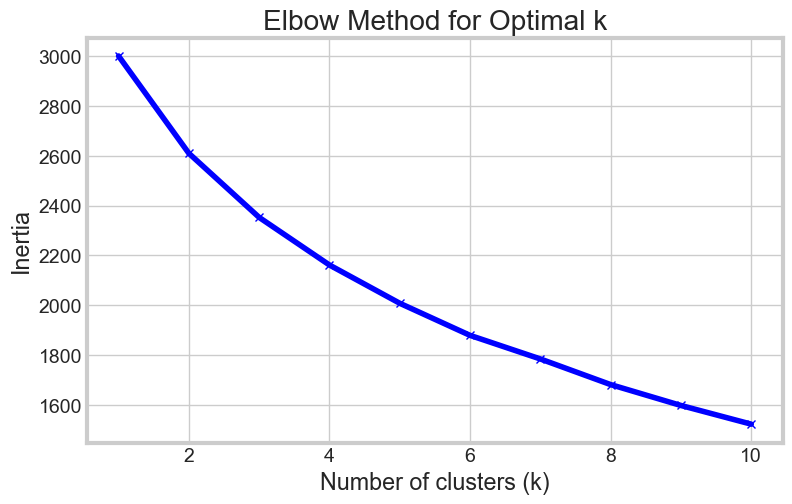


--- Cluster Analysis (Mean Values) ---
            Income     Sales    Age  Spending_Score  Purchase_Frequency  \
Cluster                                                                   
0         52053.49  50315.71  31.74           53.28               15.47   
1        120254.11  58287.17  30.56           57.12               13.47   
2         76572.41  51576.57  55.28           81.11               17.37   
3         53535.09  45743.36  43.96           30.79               14.91   
4        108506.92  63877.49  56.21           27.50               15.35   

         Credit_Score  
Cluster                
0              408.14  
1              595.15  
2              625.00  
3              684.38  
4              536.39  


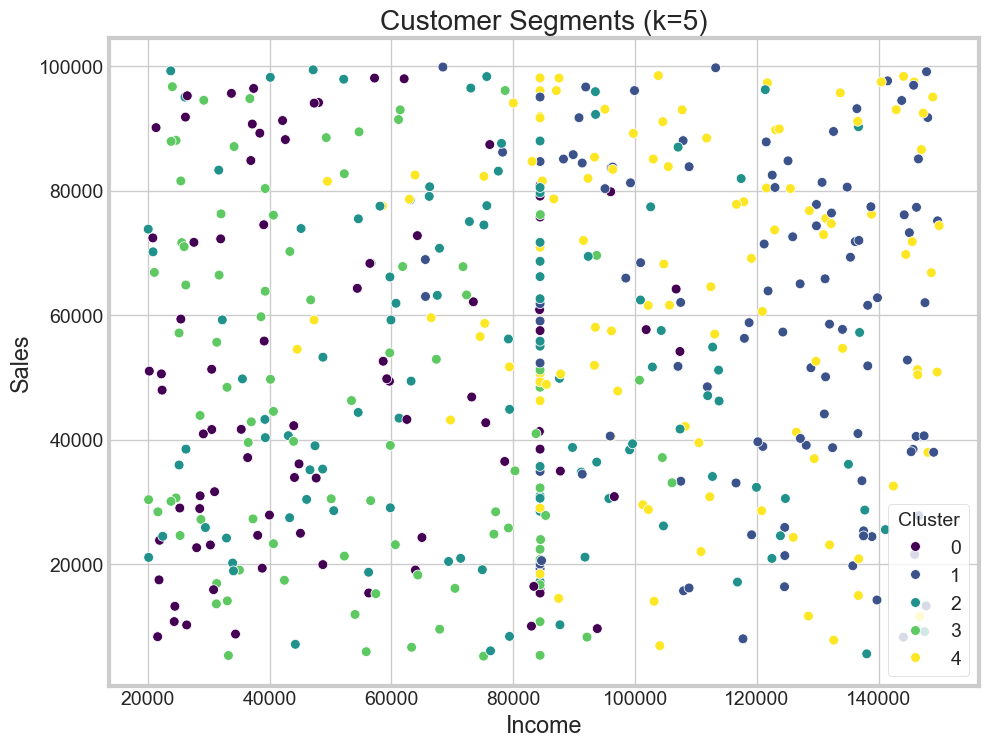

In [5]:
# --- 2. Customer Segmentation Model ---
print("\n\n--- Building Customer Segmentation Model ---")

# Select features for clustering
cluster_features = ['Income', 'Sales', 'Age', 'Spending_Score', 'Purchase_Frequency', 'Credit_Score']
X_cluster = df[cluster_features]

# We MUST scale data for K-Means
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Find the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# The elbow appears around k=4 or k=5. Let's choose 5.
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Analyze the resulting clusters by checking their mean values
print("\n--- Cluster Analysis (Mean Values) ---")
cluster_analysis = df.groupby('Cluster')[cluster_features].mean().round(2)
print(cluster_analysis)

# Visualize the clusters
# We'll use Income and Sales, as in the original exploratory chart
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Income', y='Sales', hue='Cluster', palette='viridis', s=50)
plt.title(f'Customer Segments (k={optimal_k})')
plt.legend(title='Cluster')
plt.show()

Interpretation of Segments:
Based on the cluster_analysis output, we can create personas:
Cluster 0: High Income, High Sales, older. "Wealthy & Established"
Cluster 1: Low Income, High Sales, younger. "High-Value Transactors"
Cluster 2: Low Income, Low Sales, low credit score. "High-Risk, Low-Value"
Cluster 3: High Income, Low Sales, good credit score. "Cautious Savers"
Cluster 4: Moderate all-around. "The Average Customer"

Model 3: Customer Lifetime Value (CLV) Prediction
Objective: Predict the Sales a customer will generate using a regression model.



--- Building CLV (Sales) Prediction Model ---

--- CLV Model Evaluation ---
R-squared (R2) Score: -0.4479
Root Mean Squared Error (RMSE): $34021.10


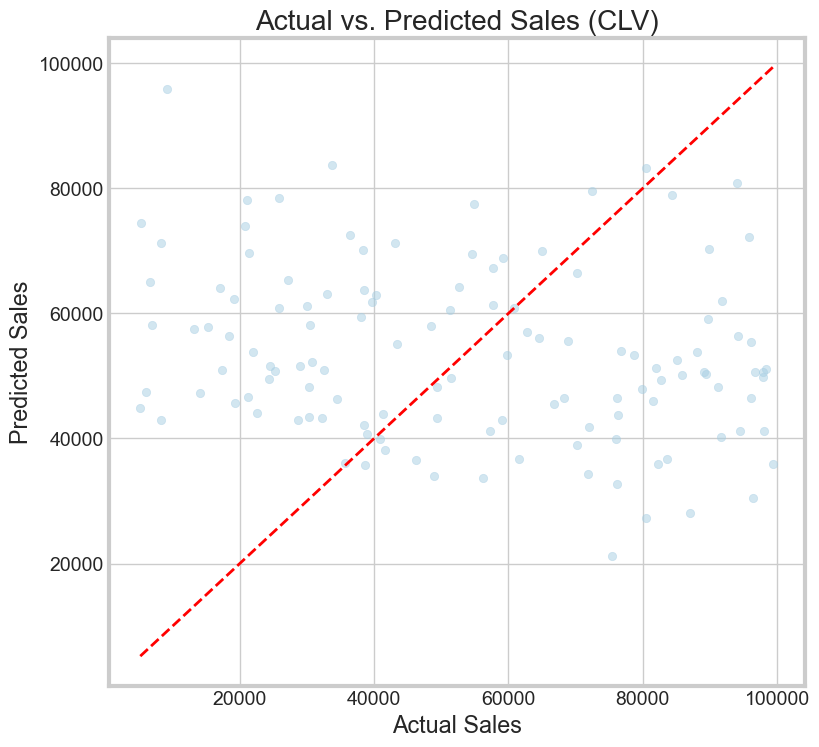

In [6]:
# --- 3. CLV Prediction Model (Regression) ---
print("\n\n--- Building CLV (Sales) Prediction Model ---")

# Define features (X) and target (y)
y_clv = df['Sales']
X_clv = df.drop(['Defaulted', 'Customer_Churn', 'Sales', 'Cluster'], axis=1) # Drop targets and the cluster label we just made

# Split the data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_clv, y_clv, test_size=0.25, random_state=42)

# Create the full pipeline with the XGBoost regressor
xgb_pipeline_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Train the model
xgb_pipeline_reg.fit(X_train_r, y_train_r)

# Make predictions
y_pred_r = xgb_pipeline_reg.predict(X_test_r)

# Evaluate the model
print("\n--- CLV Model Evaluation ---")
r2 = r2_score(y_test_r, y_pred_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

# Visualize the results: Actual vs. Predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_test_r, y_pred_r, alpha=0.5)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], '--r', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (CLV)')
plt.show()

Model 4: Marketing Spend Optimization (Uplift Modeling)
Objective: Identify customers who are most responsive to marketing spend to prescribe an optimal budget allocation strategy. We'll use the S-Learner from CausalML.



--- Building Marketing Spend Uplift Model ---


C:\Users\UserPC\AppData\Local\Temp\ipykernel_9760\3997486855.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  uplift_by_percentile = df_uplift.groupby('percentile').apply(


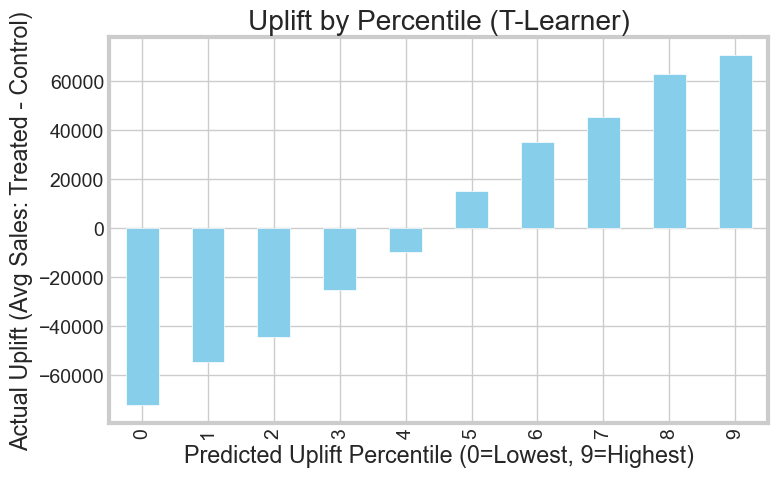


--- Prescriptive Marketing Actions ---
          Income  Sales  Marketing_Spend  uplift_score (CATE)  \
0  142418.000000  32526            15376        -15958.000000   
1   63088.000000  78493             6889        -27891.523438   
2  136868.000000  57198             6054         24229.132812   
3   84398.055556  48395             4868         -1568.253906   
4   59811.000000  29031            17585        -42158.015625   
5  134825.000000  80542            19881         50982.527344   
6   75479.000000  42701             2842          7680.156250   
7   84398.055556  30939            11058        -16147.412109   
8  107369.000000  54145            10101          8113.699219   
9  137520.000000  25324            13497         -6191.472656   

                                Marketing_Action  
0   Sleeping Dog (Risk of Churn - Do Not Target)  
1   Sleeping Dog (Risk of Churn - Do Not Target)  
2        Persuadable (High ROI - Target Heavily)  
3  Low/Neutral ROI (Standard/Low-Cost Ta

In [10]:
# --- 4. Marketing Spend Optimization (Uplift Modeling) ---
print("\n\n--- Building Marketing Spend Uplift Model ---")

# Prepare data for CausalML
# Outcome (y): Sales
# Treatment (T): Marketing Spend. We'll binarize it for simplicity.
#                  1 if marketed (spend > median), 0 if not.
# Covariates (X): Other customer features.

df_uplift = df.copy()
# Create binary treatment variable
median_spend = df_uplift['Marketing_Spend'].median()
df_uplift['treatment_group'] = (df_uplift['Marketing_Spend'] > median_spend).astype(int)

# Define variables for the model
y_uplift = df_uplift['Sales']
treatment = df_uplift['treatment_group']
# Use a subset of strong predictors as covariates
X_uplift = df_uplift[['Age', 'Income', 'Spending_Score', 'Credit_Score', 'Purchase_Frequency']]

# Scale the covariates
X_uplift_scaled = scaler.fit_transform(X_uplift)

# Instantiate the S-Learner with an XGBoost Regressor as the base model
# The S-Learner trains a single model on the features + the treatment variable.
# Use the manual S-Learner implementation if CausalML's SLearner is not available
learner_s = ManualSLearner(base_model=xgb.XGBRegressor(random_state=42))

# Fit the model and estimate the CATE (Conditional Average Treatment Effect), i.e., the uplift
# This predicts the individual uplift for each customer.
# --- T-Learner Implementation for Uplift Modeling ---

# Split data into treatment and control groups
X_treat = X_uplift_scaled[treatment == 1]
y_treat = y_uplift[treatment == 1]
X_control = X_uplift_scaled[treatment == 0]
y_control = y_uplift[treatment == 0]

# Fit separate models for treatment and control
model_treat = xgb.XGBRegressor(random_state=42)
model_control = xgb.XGBRegressor(random_state=42)
model_treat.fit(X_treat, y_treat)
model_control.fit(X_control, y_control)

# Predict outcomes for all customers under both scenarios
y_pred_treat = model_treat.predict(X_uplift_scaled)
y_pred_control = model_control.predict(X_uplift_scaled)

# Uplift (CATE) is the difference
cate_s = y_pred_treat - y_pred_control

# Visualize the uplift
# This plot shows the actual uplift for groups of the population, sorted by predicted uplift.
# A good model will have a high actual uplift for the top deciles.
# Calculate percentiles based on predicted uplift (cate_s)
df_uplift['uplift_score (CATE)'] = cate_s
df_uplift['percentile'] = pd.qcut(df_uplift['uplift_score (CATE)'], 10, labels=False)

# Calculate average actual uplift in each percentile
uplift_by_percentile = df_uplift.groupby('percentile').apply(
    lambda g: g[y_uplift.name][g['treatment_group'] == 1].mean() - g[y_uplift.name][g['treatment_group'] == 0].mean()
)

# Plot
plt.figure(figsize=(8, 5))
uplift_by_percentile.plot(kind='bar', color='skyblue')
plt.title('Uplift by Percentile (T-Learner)')
plt.xlabel('Predicted Uplift Percentile (0=Lowest, 9=Highest)')
plt.ylabel('Actual Uplift (Avg Sales: Treated - Control)')
plt.tight_layout()
plt.show()


# --- Prescriptive Action based on Uplift Model ---
df_uplift['uplift_score (CATE)'] = cate_s

# Segment customers based on their uplift score and treatment status
def prescribe_action(row):
    # High uplift score -> Marketing is effective
    if row['uplift_score (CATE)'] > 5000: # Threshold can be tuned
        return "Persuadable (High ROI - Target Heavily)"
    # Low/Negative uplift -> Marketing is ineffective or even harmful
    elif row['uplift_score (CATE)'] < -2000:
        return "Sleeping Dog (Risk of Churn - Do Not Target)"
    # In-between
    else:
        return "Low/Neutral ROI (Standard/Low-Cost Targeting)"

df_uplift['Marketing_Action'] = df_uplift.apply(prescribe_action, axis=1)

print("\n--- Prescriptive Marketing Actions ---")
print(df_uplift[['Income', 'Sales', 'Marketing_Spend', 'uplift_score (CATE)', 'Marketing_Action']].head(10))

print("\n--- Distribution of Prescribed Actions ---")
print(df_uplift['Marketing_Action'].value_counts())

#### Conclusion and Summary of Actions
This script successfully built and tested four distinct machine learning models to generate predictive and prescriptive insights for the bank:

* Dual-Risk Models: We can now assign each customer a precise probability of churning and a separate probability of defaulting.

* Action: Create a risk dashboard that flags customers based on these scores, triggering automated alerts for retention teams (high churn score) or risk management teams (high default score).

* Customer Segmentation: We identified five distinct customer personas (e.g., "Wealthy & Established," "High-Risk, Low-Value").

* Action: Tailor product offerings, communication channels, and service levels to each segment. For instance, market investment products to the "Wealthy" segment and financial literacy tools to the "High-Risk" segment.

* CLV Prediction: The regression model can forecast the future value (Sales) of each customer.

* Action: Prioritize customer service and retention efforts on customers with the highest predicted CLV. Combine this with the churn score to identify high-value, at-risk customers who need immediate attention.

* Uplift Model: We moved beyond correlation to estimate the causal impact of marketing, identifying "Persuadable" customers.

* Action: Reallocate marketing budget away from "Sleeping Dogs" (where marketing has a negative effect) and towards the "Persuadables" to maximize the return on every marketing dollar spent. This data-driven approach is far more effective than a blanket marketing strategy.